In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [11]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

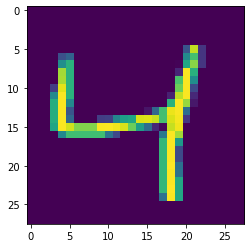

In [14]:

import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 4ms/step - loss: 0.2883 - accuracy: 0.9145 - val_loss: 0.1516 - val_accuracy: 0.9554
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1239 - accuracy: 0.9632 - val_loss: 0.1213 - val_accuracy: 0.9626
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0870 - accuracy: 0.9739 - val_loss: 0.0946 - val_accuracy: 0.9712
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0650 - accuracy: 0.9813 - val_loss: 0.0918 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0897 - val_accuracy: 0.9728
Epoch 6/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.1017 - val_accuracy: 0.9736
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0970 - val_accuracy

In [22]:
y_prob = model.predict(X_test)

In [23]:
y_pred = y_prob.argmax(axis=1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9765

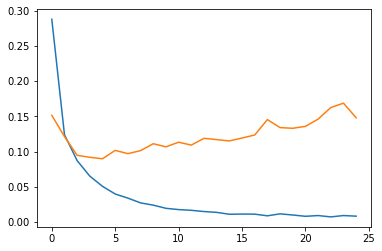

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

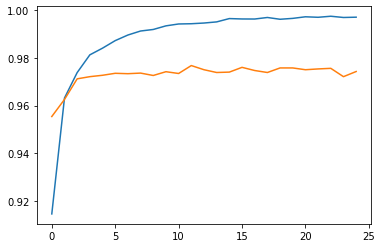

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

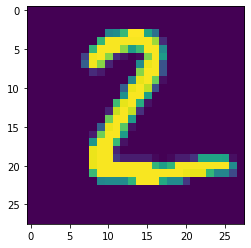

In [27]:
plt.imshow(X_test[1])

In [28]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

array([2], dtype=int64)